In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Prim's algorithm has time complexity $O(n^2)$ where $n = |V|$

## 1 node 8 tasks

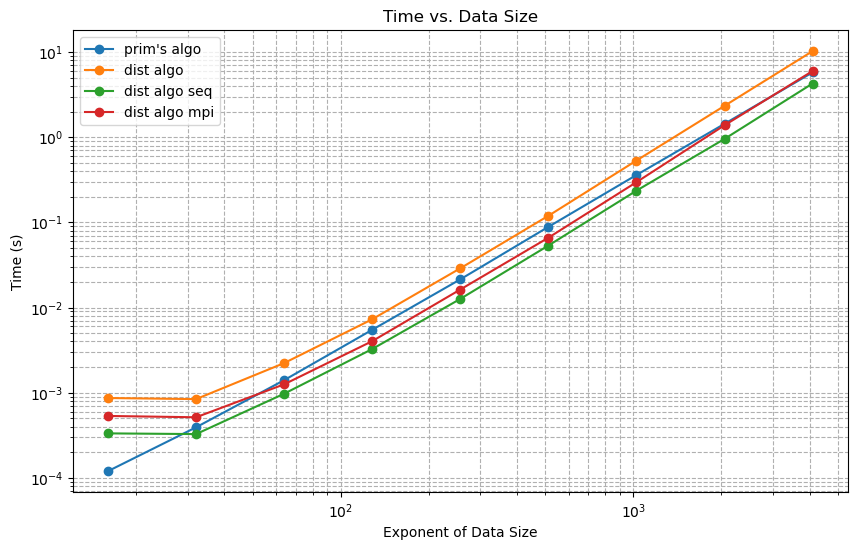

In [3]:
df = pd.read_csv('seq_vs_dist_n1_t8.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_seq'], label="prim's algo", marker='o')
plt.plot(x, df['t_dist'], label='dist algo', marker='o')
plt.plot(x, df['t_dist_seq'], label='dist algo seq', marker='o')
plt.plot(x, df['t_dist_mpi'], label='dist algo mpi', marker='o')

plt.xlabel('Exponent of Data Size')
plt.ylabel('Time (s)')
plt.title('Time vs. Data Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

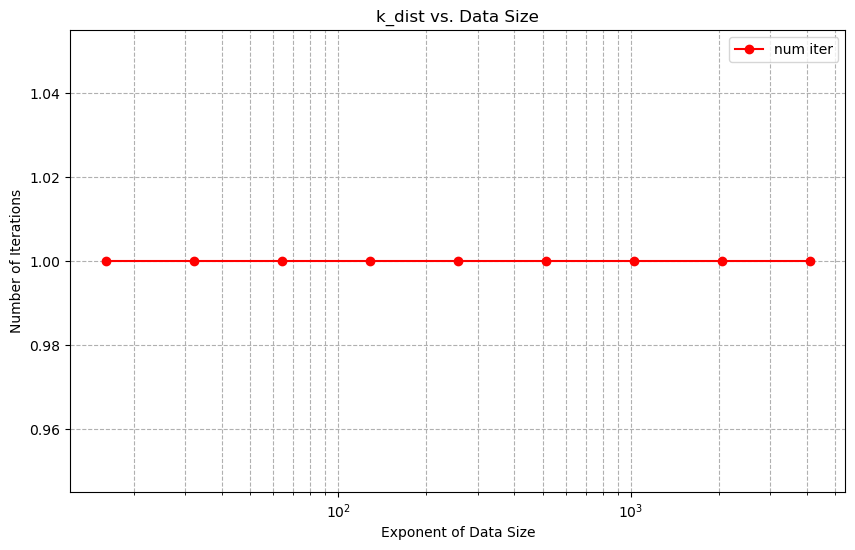

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(x, df['k_dist'], label='num iter', marker='o', color='r')

plt.xlabel('Exponent of Data Size')
plt.ylabel('Number of Iterations')
plt.title('k_dist vs. Data Size')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## 8 nodes 1 task

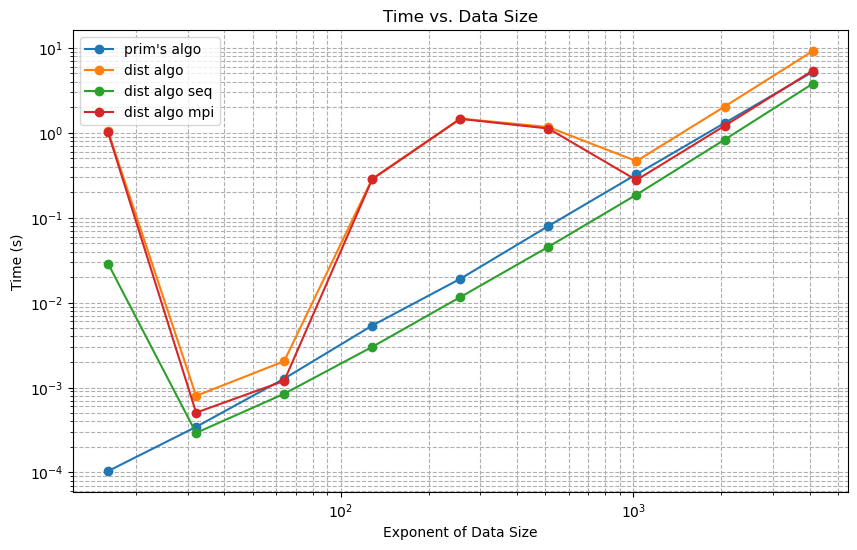

In [6]:
df = pd.read_csv('seq_vs_dist_n8_t1.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_seq'], label="prim's algo", marker='o')
plt.plot(x, df['t_dist'], label='dist algo', marker='o')
plt.plot(x, df['t_dist_seq'], label='dist algo seq', marker='o')
plt.plot(x, df['t_dist_mpi'], label='dist algo mpi', marker='o')

plt.xlabel('Exponent of Data Size')
plt.ylabel('Time (s)')
plt.title('Time vs. Data Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

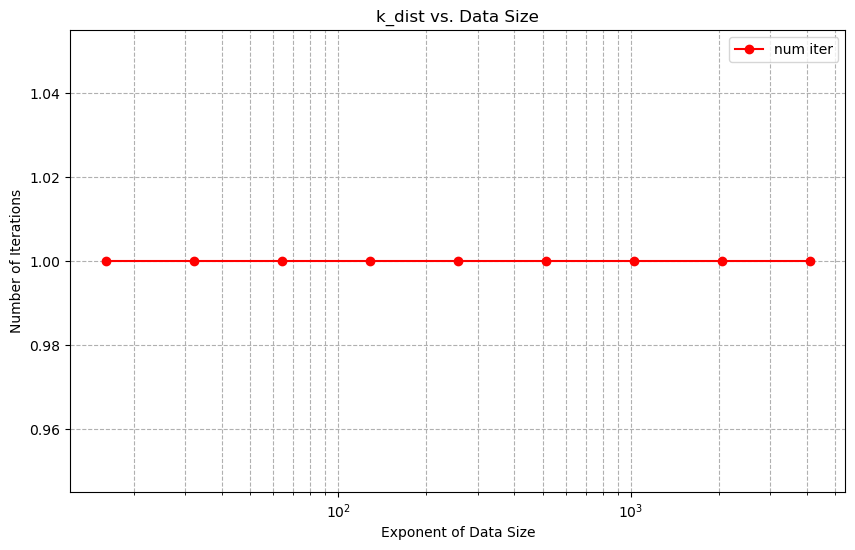

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, df['k_dist'], label='num iter', marker='o', color='r')

plt.xlabel('Exponent of Data Size')
plt.ylabel('Number of Iterations')
plt.title('k_dist vs. Data Size')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Python
Suppose $n$ is the number of vertices, $m$ is the number of machines. The size of the full graph is $8n^2$, given that each float64 takes 8 bytes in Numpy. Locally, for holding the graph, each machine locally needs
$$
  \frac{8n^2}{m}
$$
Bytes.
However, the most memory eager construction is the sendbuf during the first step, where each vertex sends edges pointing to other clusters to their cluster leaders. During the first round of the algorithm, each vertex is sending an edge to all the other vertices 

Suppose at step $k'$, there is a cluster $F_1$ belongs to super-cluster $\hat{F_1}$. At the point when all the $N$ edges are inspected, the $(N + 1)$ lightest outgoing edge ($e$) might be the MWOE (minimum weight outgoing edge) of the super cluster $\hat{F_1}$. Suppose now there is an edge $e'$ getting inspected from $\hat{F_2}$ that is connecting $\hat{F_1}$, $\hat{F_2}$, and $w(e) < w(e')$. $\hat{F_1}$ is declared finished already and merging and edge incident to that cluster could be dangerous such as merging $e'$.